In [1]:
# import seaborn as sns
from scipy.stats import circmean, circstd
from fakespikes.util import create_psd
from pykdf.kdf import load_kdf

%matplotlib inline
from brian2 import *

# EI populations

## Mixed drives (frequencies).

In [2]:
%run ../mixie.py mixie -n 20 -p 2 -q 1 -s 0.5

WARNING    Cannot use weave, a test compilation failed: pickle data was truncated (UnpicklingError) [brian2.codegen.runtime.weave_rt.weave_rt.failed_compile_test]
INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.04s, trying other methods took 0.10s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.01s, trying other methods took 0.01s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.01s, trying other methods took 0.01s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.01s, trying other methods took 0.01s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using m

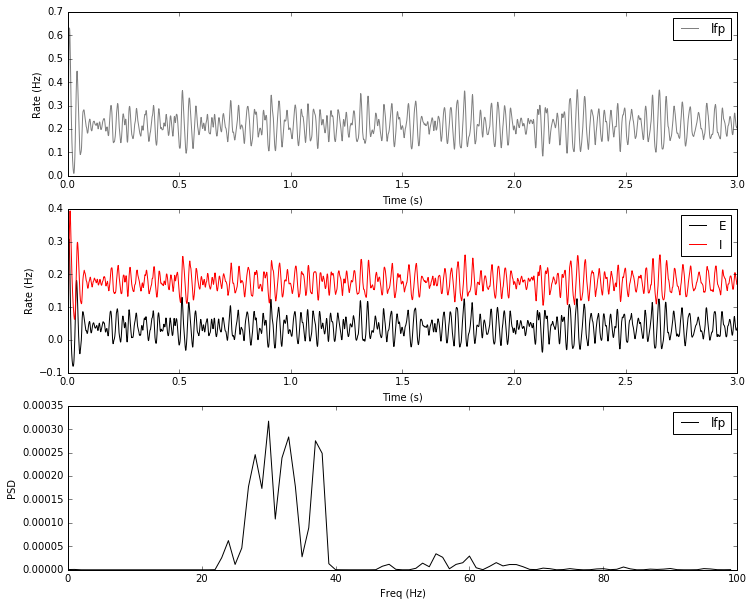

In [3]:
res = load_kdf('mixie.hdf5')

# -
t = res['t']
dt = res['dt']
times = np.linspace(0, t, t * int(1 / float(dt)))

# -
E = res['E']
I = res['I']
lfp = res['lfp']

# -
figure(figsize=(12, 10))

subplot(311)
plot(times, lfp, label='lfp', color='grey')
legend(loc='best')
xlabel("Time (s)")
ylabel("Rate (Hz)")
xlim(0, 3)

subplot(312)
plot(times, E, label='E', color='k')
plot(times, I, label='I', color='r')
legend(loc='best')
xlabel("Time (s)")
ylabel("Rate (Hz)")
xlim(0, 3)

subplot(313)
fs, psd = create_psd(lfp, 1000)
plot(fs[:100], psd[:100], label='lfp', color='k')
legend(loc='best')
xlabel("Freq (Hz)")
ylabel("PSD")

## Bursting

INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.02s, trying other methods took 0.01s). [brian2.stateupdaters.base.method_choice]


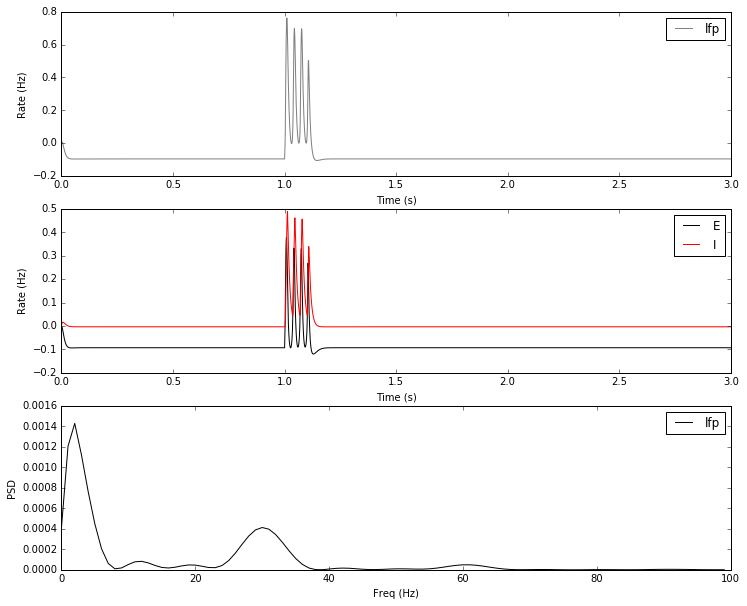

In [12]:
%run ../burstie.py burstie
res = load_kdf('burstie.hdf5')

# -
t = res['t']
dt = res['dt']
times = np.linspace(0, t, t * int(1 / float(dt)))

# -
E = res['E']
I = res['I']
lfp = res['lfp']

# -
figure(figsize=(12, 10))

subplot(311)
plot(times, lfp, label='lfp', color='grey')
legend(loc='best')
xlabel("Time (s)")
ylabel("Rate (Hz)")
xlim(0, 3)

subplot(312)
plot(times, E, label='E', color='k')
plot(times, I, label='I', color='r')
legend(loc='best')
xlabel("Time (s)")
ylabel("Rate (Hz)")
xlim(0, 3)

subplot(313)
fs, psd = create_psd(lfp, 1000)
plot(fs[:100], psd[:100], label='lfp', color='k')
legend(loc='best')
xlabel("Freq (Hz)")
ylabel("PSD")

## Drifting

INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.01s, trying other methods took 0.01s). [brian2.stateupdaters.base.method_choice]


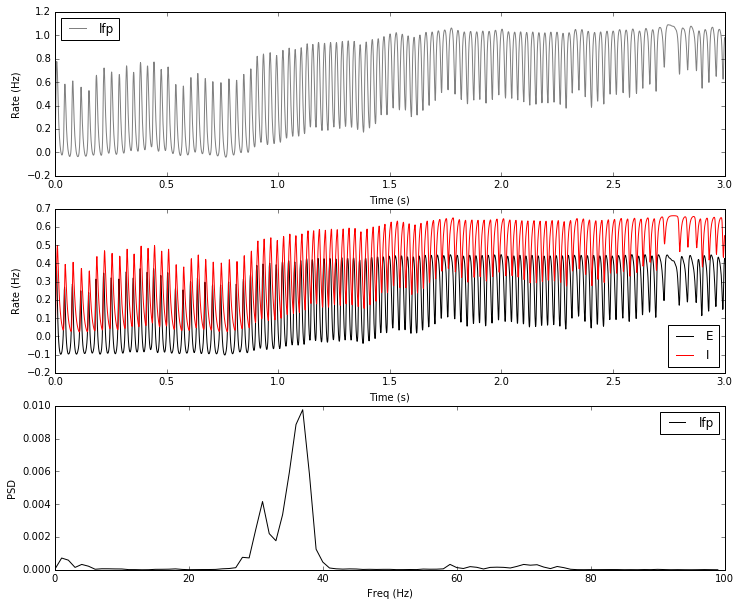

In [5]:
%run ../driftie.py driftie -d .05 --min_P 0.5
res = load_kdf('driftie.hdf5')

# -
t = res['t']
dt = res['dt']
times = np.linspace(0, t, t * int(1 / float(dt)))

# -
E = res['E']
I = res['I']
lfp = res['lfp']

# -
figure(figsize=(12, 10))

subplot(311)
plot(times, lfp, label='lfp', color='grey')
legend(loc='best')
xlabel("Time (s)")
ylabel("Rate (Hz)")
xlim(0, 3)

subplot(312)
plot(times, E, label='E', color='k')
plot(times, I, label='I', color='r')
legend(loc='best')
xlabel("Time (s)")
ylabel("Rate (Hz)")
xlim(0, 3)

subplot(313)
fs, psd = create_psd(lfp, 1000)
plot(fs[:100], psd[:100], label='lfp', color='k')
legend(loc='best')
xlabel("Freq (Hz)")
ylabel("PSD")

# Coupled oscillators

In [6]:
%run ../kur.py kur -n 20 -k 6 -o 10 -r 2

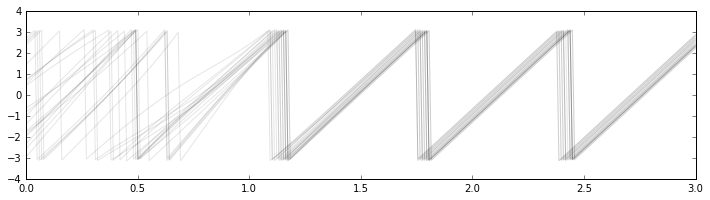

In [16]:
res = load_kdf('kur.hdf5')
times = res['times']

thetas = res['thetas']
lfp = res['lfp']
waves = res['waves']

figure(figsize=(12, 3))
plot(times, thetas, color='k', alpha=0.1);

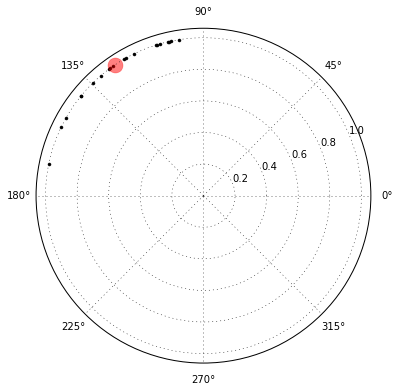

In [17]:
mTheta = circmean(thetas[times > 1, :], axis=0)
r = np.ones_like(mTheta)  # Unit vectors

figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
ax.plot(mTheta, r, '.k')
ax.plot(circmean(mTheta), 1, '.r', markersize=30, alpha=0.5)

In [18]:
# Now sample the avg theta and simulate sin waves with that property, 
# each at freq range defined in the K model
# Use this to create a LFP, and PSD

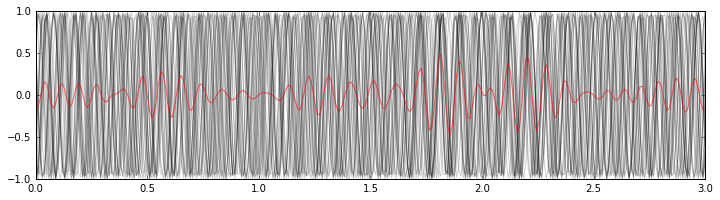

In [19]:
figure(figsize=(12, 3))
for n in range(res['N']):
    wave = waves[n, :]
    plt.plot(times, wave, color='k', alpha=0.2)

plt.plot(times, lfp, 'r', alpha=0.6)

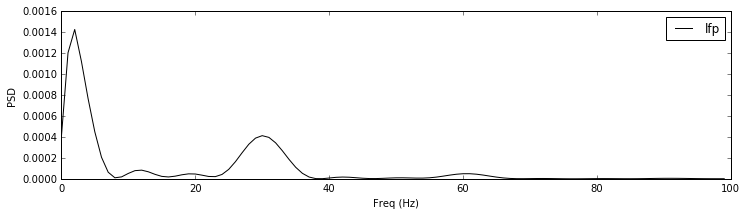

In [13]:
figure(figsize=(12, 3))
fs, psd = create_psd(lfp, int(1/res['dt']))
plot(fs[:100], psd[:100], label='lfp', color='k')
legend(loc='best')
xlabel("Freq (Hz)")
ylabel("PSD")